# Classification Project

## Goals
    - Discover drivers of churn using telco customer data.
    - Use drivers to develop a machine learning model to classify customers that end up churning or not.
    - Areas of interest I looked into were paperless billing, gender, dependents, and senior citizenship.

## Imports

In [1]:
# custom modules for data prep:
import acquire as a
import prepare as p

# tabular manipulation:
import numpy as np
import pandas as pd

# ML imports:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# imports Random Forest model from sklearn:
from sklearn.ensemble import RandomForestClassifier

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# stats:
from scipy import stats

## Acquire

- Data was acquired from the CodeUp MySQL servers.
- Contains 7043 rows and 24 columns with each row representing a Telco customer.

In [2]:
# Uses the function defined in acquire.py to load the Telco data.
df = a.get_telco_data()
df

this file exists, reading from csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


## Prepare

In [3]:
# Drops any unnecessary, unhelpful, or duplicated columns.
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [5]:
# handles the null values in internet service type by filling the null values with none.
df['internet_service_type'] = df['internet_service_type'].fillna('None')

In [6]:
# shows the counts of all values in the internet service type column.
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
None           1526
Name: count, dtype: int64

In [7]:
# replaces values in the total charges column with a blank space to 0.0
df.total_charges = df.total_charges.str.replace(' ','0.0')

In [8]:
# changes total_charges to a float instead of an object
df['total_charges'] = (df.total_charges + '0').astype(float)

In [9]:
# sets the index using customer_id
df = df.set_index(['customer_id'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64

In [11]:
df.churn.mode()

0    No
Name: churn, dtype: object

#### Data Splitting & Encoding Data
    -  it is a  60/40 split first to get the train data, then a 50/50 split on the other 40% of the data to get the validate and test.

In [12]:
# splits df into three df's train, validate, and test
train, validate, test = p.splitting_data(df, 'churn')

In [13]:
# function encodes each df's categorical columns to numbers
train_encoded, validate_encoded, test_encoded = p.telco_encoded(train, validate, test)

In [14]:
# checks the shape of all the new df's
train_encoded.shape, validate_encoded.shape, test_encoded.shape

((4225, 31), (1409, 31), (1409, 31))

In [15]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1342-JPNKI,0,10,86.05,834.10,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
3397-AVTKU,0,43,60.00,2548.55,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


## Explore

#### Hypothesize
    - I asked four questions of the customer data regarding churn in this section.

Q1: Does having paperless billing affect whether or not someone churned?

#### Visualize

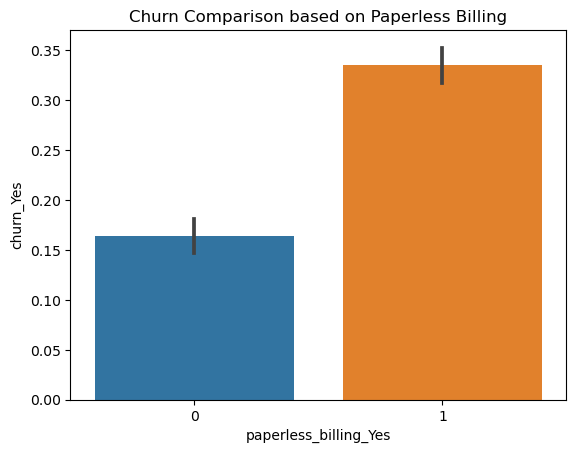

In [16]:
#creates barplot
ax = sns.barplot(data=train_encoded, y='churn_Yes', x='paperless_billing_Yes')

# Adding a title
ax.set(title='Churn Comparison based on Paperless Billing')

# Show the plot
plt.show()

We can see that people with paperless billing have a higher rate of churn (almost double).

#### Analyze (with statistics)

$H_0$: There is NO relationship between paperless billing and churn.

$H_a$: There IS relationship between paperless billing and churn.

α = 0.05

In [17]:
# creates a crosstabulation of the two columns
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.paperless_billing_Yes)
observed

#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

# returns p-value of chi2 stats test
p

3.952227763871639e-35

The p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between paperless billing and churn.

#### Summarize

We confirmed there is a relationship between paperless billing and churn, and that people with paperless billing, are more likely to churn than those who do not have paperless billing.

#### Hypothesize

Q2: Does being male affect whether or not someone churned?

#### Visualize

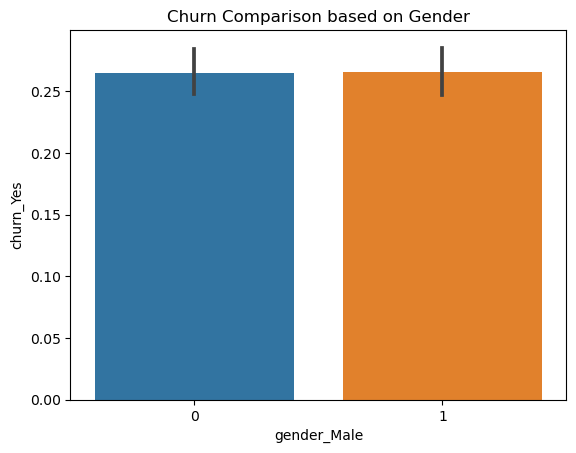

In [18]:
#creates barplot
bx = sns.barplot(data=train_encoded, y='churn_Yes', x='gender_Male')

# Adding a title
bx.set(title='Churn Comparison based on Gender')

# Show the plot
plt.show()

We can see that males do not have significantly higher rates of churn.

#### Analyze (with statistics)

𝐻0 : There is NO relationship between male gender and churn.

𝐻𝑎 : There IS relationship between male gender and churn.

α = 0.05

In [19]:
# creates a crosstabulation of the two columns
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.gender_Male)
observed

#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

# returns p-value of chi2 stats test
p

0.996031931504371

My p-value is greater than alpha, therefore, we fail to reject the null hypothesis.

We can conclude that there is NO relationship between male gender and churn.

#### Summarize

We confirmed there is NO relationship between male gender and churn, and that people that are male gender, are not more likely to churn.

#### Hypothesize

Q3: Does having dependents affect whether or not someone churned?

#### Visualize

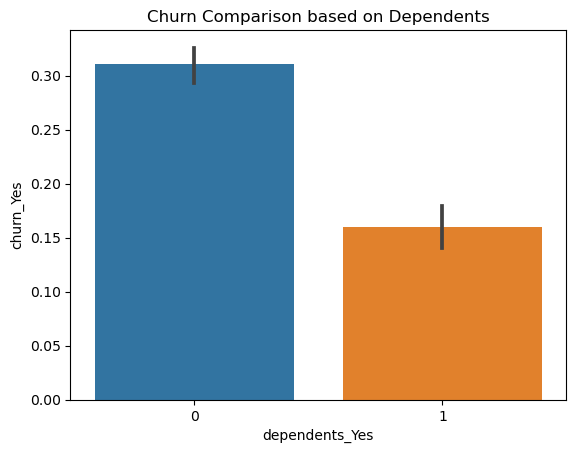

In [20]:
#creates barplot
cx = sns.barplot(data=train_encoded, y='churn_Yes', x='dependents_Yes')

# Adding a title
cx.set(title='Churn Comparison based on Dependents')

# Show the plot
plt.show()

We can see that people with dependents have a lower rate of churn (almost half).

#### Analyze (with statistics)

𝐻0 : There is NO relationship between dependents and churn.

𝐻𝑎 : There IS relationship between dependents and churn.

α = 0.05

In [21]:
# creates a crosstabulation of the two columns
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.dependents_Yes)
observed

#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

# returns p-value of chi2 stats test
p

4.91325418673439e-24

The p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between dependents and churn.

#### Summarize

We confirmed there is a relationship between dependents and churn, and that people with dependents, are more likely to churn.

#### Hypothesize

Q4: Does being a senior citizen affect whether or not someone churned?

#### Visualize

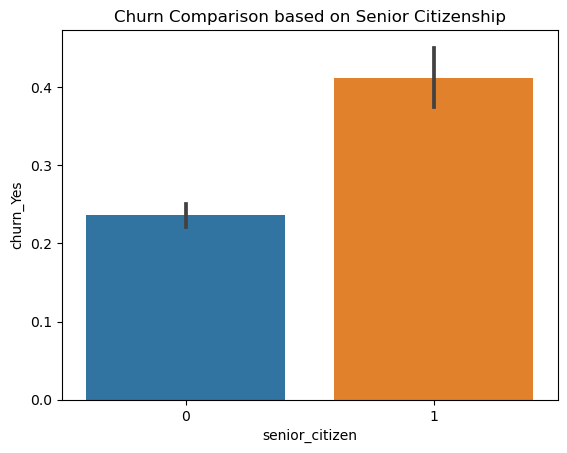

In [22]:
#creates barplot
dx = sns.barplot(data=train_encoded, y='churn_Yes', x='senior_citizen')

# Adding a title
dx.set(title='Churn Comparison based on Senior Citizenship')

# Show the plot
plt.show()

We can see that people who are senior citizens have a higher rate of churn.

#### Analyze (with statistics)

𝐻0 : There is NO relationship between senior citizenship and churn.

𝐻𝑎 : There IS relationship between senior citizenship and churn.

α = 0.05

In [23]:
# creates a crosstabulation of the two columns
observed = pd.crosstab(train_encoded.churn_Yes, train_encoded.senior_citizen)
observed

#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

# returns p-value of chi2 stats test
p

1.5271938515844278e-21

My p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude that there is a relationship between senior citizenship and churn.

#### Summarize

We confirmed there is a relationship between senior citizenship and churn, and that people with senior citizenship, are more likely to churn.

## Modeling

In [24]:
# calculates baseline accuracy
(df.churn == 'No').mean()

0.7346301292063041

In [25]:
# determine features
X_train = train_encoded.drop(columns='churn_Yes')
X_validate = validate_encoded.drop(columns='churn_Yes')
X_test = test_encoded.drop(columns='churn_Yes')

In [26]:
# determines target variable
y_train = train_encoded.churn_Yes
y_validate = validate_encoded.churn_Yes
y_test = test_encoded.churn_Yes

### Decision Tree

In [27]:
# create the decision tree object
tree = DecisionTreeClassifier(max_depth=3)
    
# fits the object only on train data
tree.fit(X_train, y_train)
    
# calculates the accuracy for train and validate
acc = tree.score(X_train, y_train)
acc_v = tree.score(X_validate, y_validate)
    
print(f'With a max depth of 3, the accuracy train = {round(acc,3)}, val = {round(acc_v,3)}')

With a max depth of 3, the accuracy train = 0.784, val = 0.788


In this case I chose a max depth of 3 because the train and validate accuracies are the closest together there and they both have a greater accuracy than the baseline.

### Logistic Regression

In [28]:
# defines what features we'd like to model around.
features = ['paperless_billing_Yes','dependents_Yes', 'senior_citizen']
X_train[features].head()

,paperless_billing_Yes,dependents_Yes,senior_citizen
customer_id,,,
4083-BFNYK,0,0,1
5804-LEPIM,1,0,1
4895-TMWIR,0,0,1
1342-JPNKI,1,0,0
3397-AVTKU,1,0,0


In [29]:
# make the model
lr = LogisticRegression()

# fit the model
lr.fit(X_train[features], y_train)

LogisticRegression()

In [30]:
# Returns the accuracy score of the LR model
lr.score(X_train[features], y_train)

0.7346745562130178

The logistic Regression model has an accuracy similar to that of the baseline, so we will most likely not use our test data on this model.

### Random Forest

In [31]:
# creates the random forest object
rf = RandomForestClassifier(min_samples_leaf=6, max_depth=5, random_state=123)

# fits the object only on train data
rf.fit(X_train, y_train)

# saves the predictions of X_train to a variable y_pred
y_pred = rf.predict(X_train)

# calculates the accuracy for train, validate, and test
acc = rf.score(X_train, y_train)
acc_val = rf.score(X_validate, y_validate)

print(f'min_leaf_samples = 6, max_depth = 5, accuracy train = {round(acc,3)}, val = {round(acc_val,3)}')

min_leaf_samples = 6, max_depth = 5, accuracy train = 0.802, val = 0.797


For the Random Forest model we are choosing min_leaf_samples = 6, max_depth = 5, because their train and validate accuracies are the closest. Additionally their 80% accuracy is higher than the baseline accuracy of 73%.

#### Choose the best model from the validation performation, and evaluate it on the test dataset
- Random Forest

### Best Model - Random Forest (Test)

In [51]:
# creates the random forest object
rf = RandomForestClassifier(min_samples_leaf=6, max_depth=5, random_state=123)

# fits the object only on train data
rf.fit(X_train, y_train)

# saves the predictions of X_test to a variable y_pred
y_pred = rf.predict(X_test)

# calculates the accuracy for test
acc_test = rf.score(X_test, y_test)

print(f'min_leaf_samples = 6, max_depth = 5, accuracy test = {round(acc_test,3)}')

min_leaf_samples = 6, max_depth = 5, accuracy test = 0.795


### Modeling Summary

- The logistic regression model had the worst accuracy which was par with the baseline accuracy on train and validate.

- The decision tree model had a slightly better accuracy than the baseline on train and validate.

- Finally, the best model of all turned out to be the random forest model with the highest accuracy of the three models. When modeling on test data it had an accuracy of about 80%.

## Conclusion

Q1: Does having paperless billing affect whether or not someone churned?
    
    A: We confirmed there is a relationship between paperless billing and churn, and that people with paperless billing, are more likely to churn than those who do not have paperless billing.

Q2: Does being male affect whether or not someone churned?
    
    A: We confirmed there is NO relationship between male gender and churn, and that people that are male gender, are not more likely to churn.

Q3: Does having dependents affect whether or not someone churned?
    
    A: We confirmed there is a relationship between dependents and churn, and that people with dependents, are more likely to churn.

Q4: Does being a senior citizen affect whether or not someone churned?
    
    A: We confirmed there is a relationship between senior citizenship and churn, and that people with senior citizenship, are more likely to churn.

### Reccomendations

- To help reduce churn, lowering monthly charges for senior citizens without dependents and with paperless billing could perhaps get more customers to stay.

### Next Steps

- If I had more time to explore the data I would look to see if customers with partners were more inclined to churn.